In [1]:
import pyvisa
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import device
import func

rm = pyvisa.ResourceManager()
visa_list = rm.list_resources()
visa_list

('TCPIP0::TEKSCOPE-536165::inst0::INSTR',
 'TCPIP0::172.20.147.149::inst0::INSTR',
 'GPIB0::8::INSTR',
 'GPIB0::10::INSTR')

In [3]:
stage = device.StageController(visa_list[2])#三軸の接続先設定
scope = device.Oscilloscope(visa_list[1])#オシロスコープの接続先指定
fg = device.FunctionGenerater(visa_list[3])#発振器の接続先指定

In [21]:
# stage.status()
fg.output()

'1\n'

In [22]:
fg.output_on()

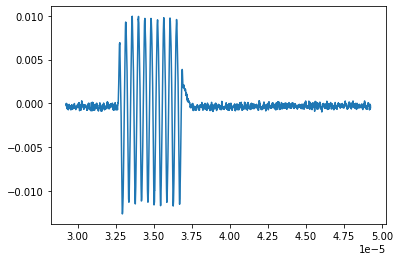

In [3]:
[time, volts]= scope.fetch(1)
plt.plot(time, volts)
plt.show()

In [3]:
func.serch(100, stage, scope)
func.serch(10, stage, scope)
func.serch(1, stage, scope)

0.02360671875 0.023399062499999998 0.02313140625 0.0235790625
         0,-      100,        21,         0,K,4,R

0.02346421875 0.023676093750000002 0.023056875 0.02344359375
         0,       100,        21,         0,K,4,R

0.02350640625 0.0231684375 0.02308546875 0.0234384375
         0,-      100,        21,         0,K,4,R

0.023512968750000002 0.02361328125 0.023597812500000002 0.02373515625
         0,        10,        23,         0,K,4,R

0.0236990625 0.02360296875 0.0236128125 0.023705625
         0,         0,        22,         0,K,4,R

0.02365640625 0.0235715625 0.02367375 0.02370140625
         0,         0,        22,         0,K,4,R

0.02374453125 0.02386875 0.023733749999999998 0.0236765625
         0,         1,        23,         0,K,4,R

0.023777812500000002 0.023694375 0.023586093750000002 0.023814375
         0,-        1,        24,         0,K,4,R

0.02376375 0.02364 0.0236840625 0.02393765625
         0,-        1,        25,         0,K,4,R

0.02361 0.023734218

In [4]:
volt_list = []
# fg.output_on()
for f in range(800,2401,25): #800KHz 2.4MHz
    fg.change_frequency(f*1000)
    time.sleep(20)
    pk2pk = scope.get_pk2pk(1) #1ch
    volt_list.append(pk2pk)

    [times, volts]= scope.fetch(1)
    plt.plot(times, volts)
    plt.show()

fg.output_off()

In [10]:
df = pd.DataFrame({'3-1' :volt_list}, index=range(800,2401,25))

# df['1-2'] = volt_list1;
# df['2-3'] = volt_list2;
# df['3-1'] = volt_list3;
df

ValueError: Length of values (0) does not match length of index (65)

In [14]:
df.to_csv("相互校正用PVDFセンサ1117_31.csv")